In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()



X = data.data
y = data.target

from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1,test_size=0.2, train_size=0.8, random_state=0)
train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


In [2]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

clf.fit(X_train, y_train)


/home/ma/.bin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [3]:
clf.score(X_test, y_test)


0.9473684210526315

In [4]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

In [5]:
np.count_nonzero(y_test==0), np.count_nonzero(y_test==1)


(47, 67)

In [6]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
y_pred = clf.predict(X_test)


In [8]:
conf_mat = np.zeros([2,2])

for true_label, est_label in zip(y_test, y_pred):
    conf_mat[true_label, est_label] +=1

print(conf_mat)


[[45.  2.]
 [ 4. 63.]]


In [13]:
df = pd.DataFrame(conf_mat, columns=['pred 0', 'pred 1'], index=['true 0', 'true 1'])


In [14]:
df

,pred 0,pred 1
true 0,45.0,2.0
true 1,4.0,63.0


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [16]:
accuracy_score(y_test,y_pred)

0.9473684210526315

In [17]:
cmat = confusion_matrix(y_test, y_pred)

In [18]:
cmat

array([[45,  2],
       [ 4, 63]])

In [19]:
TP = cmat[0,0] #true positive


In [20]:
TN = cmat[1,1] #true negative

In [21]:
FP = cmat[1,0]

In [22]:
FN = cmat[0,1]

In [23]:
from sklearn.datasets import load_digits

data = load_digits()


In [25]:
X = data.data
y= data.target

img = data.images
 


In [26]:
X[0].shape

(64,)

In [27]:
img[0].shape

(8, 8)

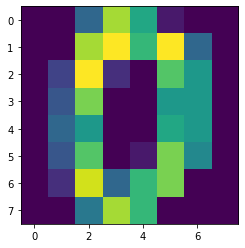

In [28]:
plt.imshow(img[0])

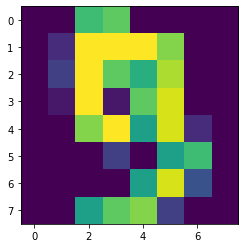

In [30]:
for i in range(1,10):
    plt.imshow(img[i])

In [31]:
for i in range(1,10):
    print(i)

1
2
3
4
5
6
7
8
9
